In [33]:
import glob
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [34]:
result_dir = "sim-results"

In [94]:
classes = ['A','B','C','D','E','F','G','H','I']
schedulers = ['LP-D=0', 'LP-D=1','CG-D=0','CG-D=1']
colors = {
    'LP-D=0': "skyblue",
    'LP-D=1': "lightgreen",
    'CG-D=0': "salmon",
    'CG-D=1': "gold"
}

ratio_list_list = []
label_list = []
color_list = []
position_list = []
label_list2 = []
geo_means = {}
ratio_all = {}

for scheduler in schedulers:
    ratio_all[scheduler] = []

ind = 0
for dataclass in classes:
    gmean_tbl = {}
    for scheduler in schedulers:
        folder = result_dir + "/" + str(dataclass) + '-' + str(scheduler)
        # print("folder:")
        # print(folder)
        filelist = glob.glob(folder + '/result-*.json')
        # print("filelist:")
        # print(filelist)

        ratio_list = []

        for jsonfile in filelist:
            # print(jsonfile)
            with open(jsonfile) as f:
                data = json.load(f)
                ratio = data['z_sum'] / data['total_cycle']
                ratio_list.append(ratio)
                ratio_all[scheduler].append(ratio)
        # bp = ax.boxplot(ratio_list)
        ratio_list_list.append(ratio_list)
        label_list.append(folder)
        gmean_tbl[scheduler] = np.exp(np.mean(np.log(ratio_list)))

        if scheduler == 'LP-D=0':
            xlabel = 'ILP-C'
        elif scheduler == 'LP-D=1':
            xlabel = 'ILP-C w.d.'
        elif scheduler == 'CG-D=0':
            xlabel = 'CG'
        elif scheduler == 'CG-D=1':
            xlabel = 'CG w.d.'
        else:
            xlabel = 'Unknown'
        label_list2.append(xlabel)
        color_list.append(colors[scheduler])

        # indからx座標
        number = ind / 4
        period = ind % 4 # scheduler 

        xpos =   number * 5 + period * 1
        
        # indからy座標

        position_list.append(ind-5)

    geo_means[dataclass] = gmean_tbl

In [95]:
# for LaTeX table
#geo_means

table_str = ""
for dataclass in classes:
    table_str += dataclass
    for scheduler in schedulers:
        gmean = geo_means[dataclass][scheduler]
        table_str += " & " + f"{gmean:.2f}"

    table_str += "\n"

print(table_str + '\n')

geo_mean_all = {}

for scheduler in schedulers:
    geo_mean_all[scheduler] = np.exp(np.mean(np.log(ratio_all[scheduler])))

print(geo_mean_all)

A & 2.86 & 2.87 & 3.05 & 3.06
B & 3.66 & 3.65 & 3.78 & 3.85
C & 4.02 & 4.01 & 4.11 & 4.20
D & 1.78 & 1.78 & 1.80 & 1.80
E & 1.48 & 1.48 & 1.50 & 1.50
F & 1.38 & 1.38 & 1.40 & 1.40
G & 2.25 & 2.26 & 2.33 & 2.33
H & 4.20 & 4.20 & 4.42 & 4.53
I & 1.32 & 1.33 & 1.34 & 1.34


{'LP-D=0': 2.315792597607132, 'LP-D=1': 2.317640833474616, 'CG-D=0': 2.3808210134873784, 'CG-D=1': 2.3981491029075443}


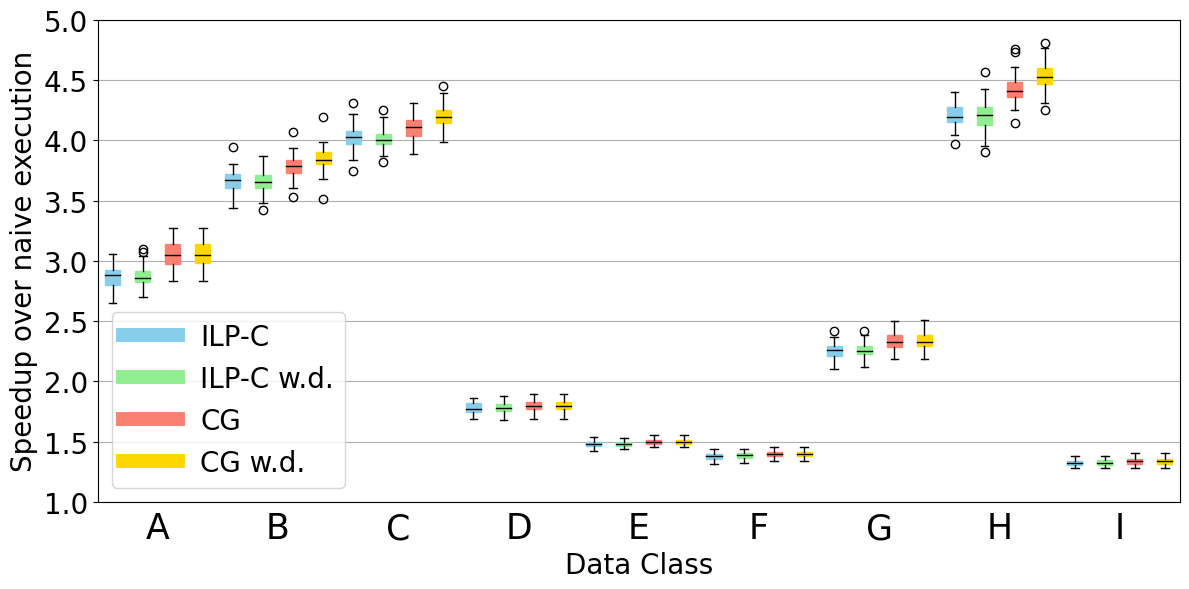

In [98]:
# データを箱ひげ図の形式に整形（min, mean, maxを仮想箱ひげに変換）
fig, ax = plt.subplots(figsize=(12, 6))

positions = np.arange(len(classes))

width = 0.15
offsets = [-1.5, -0.5, 0.5, 1.5]


# for ratio_list in ratio_list_list:
#     for label in label_list:
#         for position in position_list:
#             ax.boxplot(ratio_list, labels=[label])
#         # , widths=width, patch_artist=True,
#             #    boxprops=dict(facecolor=colors[label], color=colors[label]),
#             #    medianprops=dict(color='black'), label=label)
bp = ax.boxplot(ratio_list_list,
                labels=label_list2,
                patch_artist=True,
                medianprops={
                'color': 'black',
                'linewidth':1,
                'linestyle': '-',
            })

# 色を各箱に割り当て
for patch, color in zip(bp['boxes'], color_list):
    patch.set_color(color)
# for b, c in zip(bp['whiskers'], color_list):
#     b.set(color=c, linewidth=1)
# ヒゲの先端の線の設定
# for b, c in zip(bp['caps'], color_list):
#     b.set(color=c, linewidth=1)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
plt.xticks([2.5, 6.5, 10.5, 14.5, 18.5, 22.5, 26.5, 30.5, 34.5], ['A','B','C','D','E','F','G','H','I'], fontsize=25)
plt.yticks(fontsize=20)
plt.grid(axis = 'y')
# 描画
# plt.xticks(rotation=45)
plt.xlabel("Data Class", fontsize=20)
plt.ylabel("Speedup over naive execution", fontsize=20)

labels = ['ILP-C', 'ILP-C w.d.', 'CG', 'CG w.d.']

handles = []
for label in labels:
    if label == 'ILP-C':
        color = colors['LP-D=0']
    elif label == 'ILP-C w.d.':
        color = colors['LP-D=1']
    elif label == 'CG':
        color = colors['CG-D=0']
    elif label == 'CG w.d.':
        color = colors['CG-D=1']
    else:
        color = 'black'

    handle = plt.Line2D([0], [0], color=color, lw=10)
    handles.append(handle)

#ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
ax.legend(handles, labels, loc='lower left', fontsize=20)
ax.set_ylim(1, 5)

plt.vlines([4.5,8.5,12.5,16.5,20.5,24.5,28.5,32.5], ymin=0, ymax=1, color = "lightgray", linestyles='-') 
plt.tight_layout()
plt.savefig('performance.pdf') # dpi=300
plt.show()

In [82]:
classes = ['A','B','C','D','E','F','G','H','I']
schedulers = ['LP','CG']
defrags = ['D=0','D=1']

colors = {
    'LP-D=0': "skyblue",
    'LP-D=1': "lightgreen",
    'CG-D=0': "salmon",
    'CG-D=1': "gold"
}

label_list = []
position_list_list = []
improvement_list_list = []

for dataclass in classes: # A-I
    for scheduler in schedulers: # LP, CG
        improvement_list = []
        position_list = []
        xpos = 0
        for i in range(20):
            # z_sum_pair = []
            total_cycle_pair = []
            for defrag in defrags:# D=0, D=1
                folder = result_dir + "/" + str(dataclass) + '-' + str(scheduler) + '-' + str(defrag)
                filename = folder + '/result-requests-' +str(i+1) + '.json'
                # print(filename)
                with open(filename) as f:
                    data = json.load(f)
                    total_cycle = data['total_cycle']
                    # print("total_cycle:" + str(total_cycle))
                    total_cycle_pair.append(total_cycle)

            improvement = (total_cycle_pair[0] - total_cycle_pair[1]) / total_cycle_pair[0]
            # print("improvement:")
            # print(improvement)
            improvement_list.append(improvement)
            xpos += 1
            position_list.append(xpos)
        xpos += 3
        position_list_list.append(position_list)
        improvement_list_list.append(improvement_list)

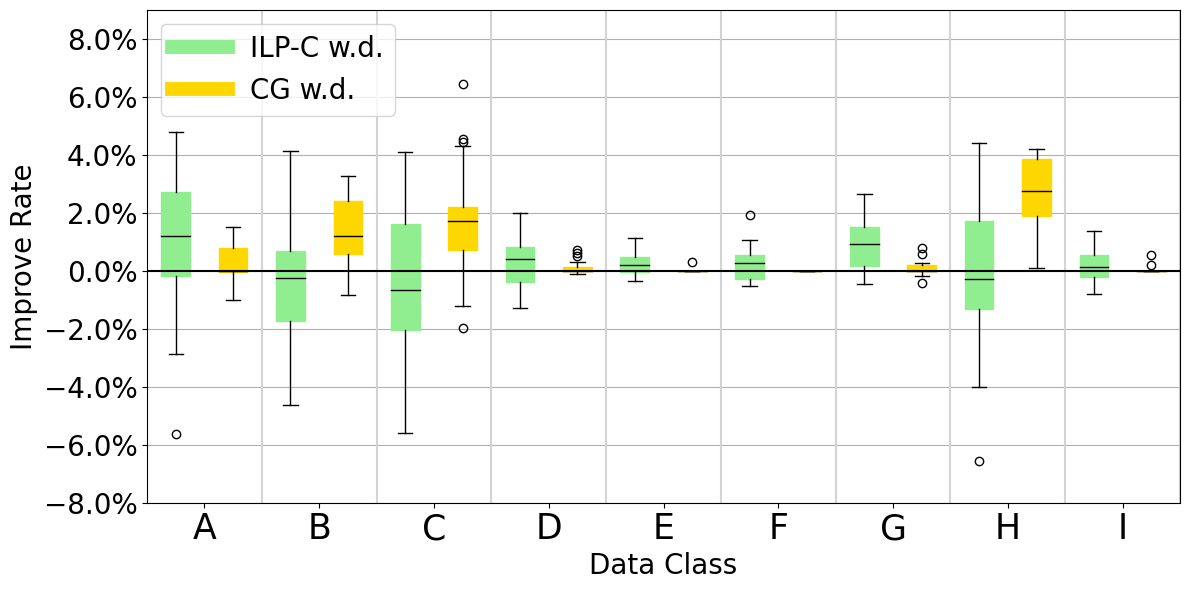

In [78]:
# データを箱ひげ図の形式に整形（min, mean, maxを仮想箱ひげに変換）
fig, ax = plt.subplots(figsize=(12, 6))

positions = np.arange(len(classes))

width = 0.15
offsets = [-1.5, -0.5, 0.5, 1.5]

bp = ax.boxplot(improvement_list_list, positions=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                patch_artist=True,
                
                medianprops={
                'color': 'black',
                'linewidth':1,
                'linestyle': '-',
            })

# 色を各箱に割り当て
colorlist = ["lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold", "lightgreen", "gold"]
len(colorlist)

for patch, color in zip(bp['boxes'], colorlist):
    patch.set_color(color)
# for b, c in zip(bp['whiskers'], color_list):
#     b.set(color=c, linewidth=1)
# # ヒゲの先端の線の設定
# for b, c in zip(bp['caps'], color_list):
#     b.set(color=c, linewidth=1)

# ax.tick_params(axis='x', which='both', bottom=False, top=False)
plt.xticks([0.5, 2.5, 4.5, 6.5, 8.5, 10.5, 12.5, 14.5, 16.5], ['A','B','C','D','E','F','G','H','I'], fontsize=25)
plt.yticks(fontsize=20)
plt.grid(axis = 'y')
# 描画
plt.xlabel("Data Class", fontsize=20)
plt.ylabel("Improve Rate", fontsize=20)

labels = ['ILP-C w.d.', 'CG w.d.']

handles = []
for label in labels:
    if label == 'ILP-C':
        color = colors['LP-D=0']
    elif label == 'ILP-C w.d.':
        color = colors['LP-D=1']
    elif label == 'CG':
        color = colors['CG-D=0']
    elif label == 'CG w.d.':
        color = colors['CG-D=1']
    else:
        color = 'black'

    handle = plt.Line2D([0], [0], color=color, lw=10)
    handles.append(handle)
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
ax.legend(handles, labels, loc='upper left', fontsize=20)
ax.set_ylim(-0.08, 0.09)
# ax.set_ylim(-0.05, 0.10)
ax.set_xlim(-0.5, 17.5)

plt.vlines([1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5], ymin=-10, ymax=10, color = "lightgray", linestyles='-') 
plt.hlines(0, xmin=-1, xmax=20, color = "black", linestyles='-')
plt.tight_layout()
plt.savefig('improvement.pdf') # dpi=300
plt.show()